In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from six.moves import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread
import platform

def load_pickle(f):
    return  pickle.load(f)
    raise ValueError("invalid python version: {}".format(version))#check python version

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y #reference from Github

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte#offical method

In [2]:
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
'''samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()'''

"samples_per_class = 5\nfor y, cls in enumerate(classes):\n    idxs = np.flatnonzero(y_train == y)\n    idxs = np.random.choice(idxs, samples_per_class, replace=False)\n    for i, idx in enumerate(idxs):\n        plt_idx = i * num_classes + y + 1\n        plt.subplot(samples_per_class, num_classes, plt_idx)\n        plt.imshow(X_train[idx].astype('uint8'))\n        plt.axis('off')\n        if i == 0:\n            plt.title(cls)\nplt.show()"

In [12]:
num_training = 49000
num_validation = 1000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]


# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

IndexError: index 49000 is out of bounds for axis 0 with size 49000

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

#  print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (10000, 3072)
dev data shape:  (500, 3072)


In [6]:
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

iteration 0 / 6000: loss 415.310053
iteration 100 / 6000: loss 243.311367
iteration 200 / 6000: loss 149.663177
iteration 300 / 6000: loss 91.544937
iteration 400 / 6000: loss 57.233706
iteration 500 / 6000: loss 36.437141
iteration 600 / 6000: loss 23.511397
iteration 700 / 6000: loss 16.382672
iteration 800 / 6000: loss 11.212185
iteration 900 / 6000: loss 9.307514
iteration 1000 / 6000: loss 7.146279
iteration 1100 / 6000: loss 6.371967
iteration 1200 / 6000: loss 6.014936
iteration 1300 / 6000: loss 5.190503
iteration 1400 / 6000: loss 5.294888
iteration 1500 / 6000: loss 5.358771
iteration 1600 / 6000: loss 5.438908
iteration 1700 / 6000: loss 5.325443
iteration 1800 / 6000: loss 5.189342
iteration 1900 / 6000: loss 5.186030
iteration 2000 / 6000: loss 5.347453
iteration 2100 / 6000: loss 4.954253
iteration 2200 / 6000: loss 5.053960
iteration 2300 / 6000: loss 5.577104
iteration 2400 / 6000: loss 5.418405
iteration 2500 / 6000: loss 4.879032
iteration 2600 / 6000: loss 4.906789
i

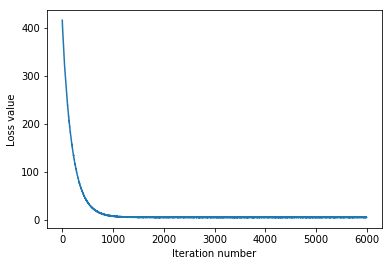

In [7]:
class LinearSVM:
    def __init__(self):
        self.W = None
    
    def loss(self, X, y, reg):
        """
        Structured SVM loss function, vectorized implementation.

        Inputs and outputs are the same as svm_loss_naive.
        """
        loss = 0.0
        dW = np.zeros(self.W.shape) # initialize the gradient as zero

        num_train = X.shape[0]
        scores = X.dot(self.W)
        correct_class_score = scores[range(num_train), list(y)].reshape(-1,1) # (N,1)
        margin = np.maximum(0, scores - correct_class_score + 1)
        margin[range(num_train), list(y)] = 0
        loss = np.sum(margin) / num_train + 0.5 * reg * np.sum(self.W * self.W)
  
        num_classes = self.W.shape[1]
        inter_mat = np.zeros((num_train, num_classes))
        inter_mat[margin > 0] = 1
        inter_mat[range(num_train), list(y)] = 0
        inter_mat[range(num_train), list(y)] = -np.sum(inter_mat, axis=1)

        dW = (X.T).dot(inter_mat)
        dW = dW/num_train + reg*self.W

        return loss, dW
    
    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        num_train, dim = X.shape
        num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None
            idx_batch = np.random.choice(num_train, batch_size, replace = True)
            X_batch = X[idx_batch]
            y_batch = y[idx_batch]

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            self.W -=  learning_rate * grad

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis = 1)
        return y_pred

import time
svmlinear = LinearSVM()
tic = time.time()
loss_hist = svmlinear.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=6000, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))#running time
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [8]:
y_train_pred = svmlinear.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svmlinear.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))
print (y_train_pred.shape)

training accuracy: 0.378980
validation accuracy: 0.386000
(49000,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=16,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto',
                           metric='mahalanobis'
                           )
clf = clf.fit(X_train, y_train)
y_val_pred_KNN = clf.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

ValueError: Must provide either V or VI for Mahalanobis distance